In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
# 定义feature 对应的 value
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

path = './data/iris.csv'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})

In [15]:
x, y = np.split(data, (4,), axis=1)

In [17]:
x = x[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
model = Pipeline([
    ('ss', StandardScaler()),
    ('DTC', DecisionTreeClassifier(criterion='entropy', max_depth=3))])
# clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)  

In [ ]:
# 画图
N, M = 100, 100  # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

# # 无意义，只是为了凑另外两个维度
# # 打开该注释前，确保注释掉x = x[:, :2]
# x3 = np.ones(x1.size) * np.average(x[:, 2])
# x4 = np.ones(x1.size) * np.average(x[:, 3])
# x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.ravel(), edgecolors='k', s=100, cmap=cm_dark, marker='o')  # 测试数据
plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17)
plt.show()

In [ ]:
y_test = y_test.reshape(-1)
print(y_test_hat)
print(y_test)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

NameError: name 'iris_feature' is not defined

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


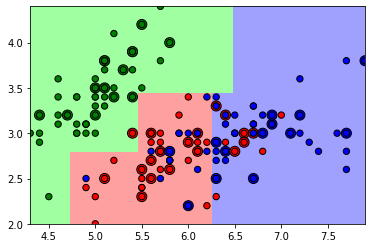

In [20]:
# 画图
N, M = 100, 100  # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

# # 无意义，只是为了凑另外两个维度
# # 打开该注释前，确保注释掉x = x[:, :2]
# x3 = np.ones(x1.size) * np.average(x[:, 2])
# x4 = np.ones(x1.size) * np.average(x[:, 3])
# x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.ravel(), edgecolors='k', s=100, cmap=cm_dark, marker='o')  # 测试数据
plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17)
plt.show()

In [19]:
y_test = y_test.reshape(-1)
print(y_test_hat)
print(y_test)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

[0. 1. 2. 0. 2. 2. 2. 0. 0. 2. 1. 0. 2. 2. 1. 0. 1. 1. 0. 0. 1. 0. 2. 0.
 2. 1. 0. 0. 1. 2. 1. 2. 1. 2. 1. 0. 1. 0. 2. 2. 2. 0. 1. 2. 2.]
[0. 1. 1. 0. 2. 1. 2. 0. 0. 2. 1. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 2. 1. 0. 0. 1. 2. 1. 2. 1. 2. 2. 0. 1. 0. 1. 2. 2. 0. 2. 2. 1.]
准确度: 80.00%
